# hSimple

This program creates:
* A one-dimensional histogram
* A two-dimensional histogram
* A profile histogram
* A memory-resident ntuple

These objects are filled with some random numbers and saved on a file called `hsimple.root` in `$PWD`.

---

In [1]:
import ROOT

Welcome to ROOTaaS 6.05/01


Create a new machine-independent ROOT binary file. Note that this file may contain any kind of ROOT objects, histograms, pictures, graphics objects, detector geometries, tracks, events, etc.

This file will become the current directory.

In [2]:
filename = "hsimple.root"
hfile = ROOT.TFile(filename,"RECREATE","Demo ROOT file with histograms")

Create two histograms, a profile histogram and an ntuple.

In [3]:
hpx = ROOT.TH1F("hpx","This is the px distribution",64,-4,4)
hpxpy = ROOT.TH2F("hpxpy","py vs px",64,-4,4,64,-4,4)
hprof = ROOT.TProfile("hprof","Profile of pz versus px",64,-4,4,0,20)
ntuple = ROOT.TNtuple("ntuple","Demo ntuple","px:py:pz:random:i")

Create a new canvas.

In [4]:
c1 = ROOT.TCanvas("c1","Filling Example",800,600)

Fill histograms randomly and benchmark it.

In [5]:
benchmarkName = "hsimple"
ROOT.gBenchmark.Start(benchmarkName)

r = ROOT.TRandom3()
rD = ROOT.Double
px, py, pz = rD(0.), rD(0.), rD(0.)
for i in range(50000):
    r.Rannor(px,py)
    pz = px*px + py*py
    rnd = r.Rndm()
    hpx.Fill(px)
    hpxpy.Fill(px,py)
    hprof.Fill(px,pz)
    ntuple.Fill(px,py,pz,rnd,i)

ROOT.gBenchmark.Show(benchmarkName)

hsimple   : Real Time =   0.88 seconds Cpu Time =   0.93 seconds


Save all objects in the `hsimple.root` file.

In [6]:
hpx.SetFillColor(0)
print "Bytes written:", hfile.Write()

Bytes written: 6969


Draw the histogram and the canvas.

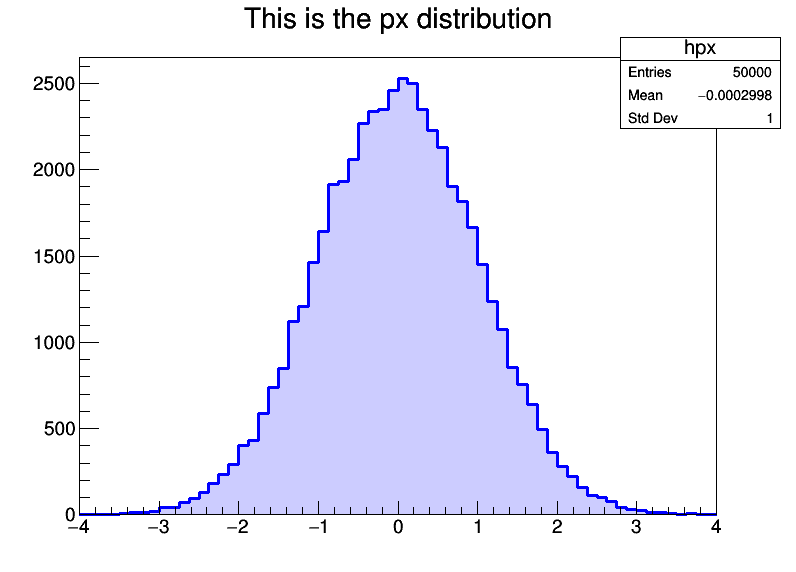

In [7]:
hpx.SetFillColor(ROOT.kBlue-10)
hpx.SetLineColor(ROOT.kBlue)
hpx.Draw()
c1.Draw()

Close the file and list its contents.

In [8]:
hfile.Close();

In [9]:
%%bash
rootls -1 hsimple.root

hprof
hpx
hpxpy
ntuple
